In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SVMSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 21s 101us/step - loss: 0.0015 - val_loss: 3.1294e-04
Epoch 2/150
213605/213605 [==============================] - 21s 97us/step - loss: 2.2045e-04 - val_loss: 1.8182e-04
Epoch 3/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.4197e-04 - val_loss: 1.3113e-04
Epoch 4/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.2214e-04 - val_loss: 1.1661e-04
Epoch 5/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.1470e-04 - val_loss: 1.1515e-04
Epoch 6/150
213605/213605 [==============================] - 21s 96us/step - loss: 1.0954e-04 - val_loss: 1.1891e-04
Epoch 7/150
213605/213605 [==================

213605/213605 [==============================] - 20s 96us/step - loss: 4.0773e-05 - val_loss: 4.1697e-05
Epoch 69/150
213605/213605 [==============================] - 20s 94us/step - loss: 4.0397e-05 - val_loss: 4.2803e-05
Epoch 70/150
213605/213605 [==============================] - 20s 96us/step - loss: 4.0343e-05 - val_loss: 4.7899e-05
Epoch 71/150
213605/213605 [==============================] - 20s 96us/step - loss: 4.0182e-05 - val_loss: 4.0393e-05
Epoch 72/150
213605/213605 [==============================] - 20s 96us/step - loss: 4.0061e-05 - val_loss: 5.1408e-05
Epoch 73/150
213605/213605 [==============================] - 20s 96us/step - loss: 4.0189e-05 - val_loss: 4.6229e-05
Epoch 74/150
213605/213605 [==============================] - 20s 95us/step - loss: 4.0009e-05 - val_loss: 4.5172e-05
Epoch 75/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.9743e-05 - val_loss: 4.3089e-05
Epoch 76/150
213605/213605 [==============================] - 20s 95u

213605/213605 [==============================] - 20s 94us/step - loss: 3.4878e-05 - val_loss: 3.4447e-05
Epoch 138/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.4235e-05 - val_loss: 4.8463e-05
Epoch 139/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.4379e-05 - val_loss: 3.8927e-05
Epoch 140/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.4293e-05 - val_loss: 3.5961e-05
Epoch 141/150
213605/213605 [==============================] - 20s 96us/step - loss: 3.4405e-05 - val_loss: 3.7956e-05
Epoch 142/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.4261e-05 - val_loss: 3.5054e-05
Epoch 143/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.4205e-05 - val_loss: 3.3061e-05
Epoch 144/150
213605/213605 [==============================] - 20s 96us/step - loss: 3.4009e-05 - val_loss: 3.5225e-05
Epoch 145/150
213605/213605 [==============================] -

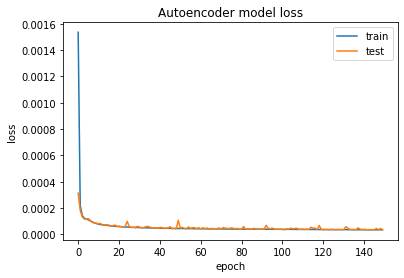

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 50s 234us/step - loss: 0.0698 - accuracy: 0.9796 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 2/50
213605/213605 [==============================] - 47s 222us/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 3/50
213605/213605 [==============================] - 47s 219us/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/50
213605/213605 [==============================] - 47s 219us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 5/50
213605/213605 [==============================] - 46s 215us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 6/50
213605/213605 [==============================] - 45s 212us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 7/50
213605/213605 [=================

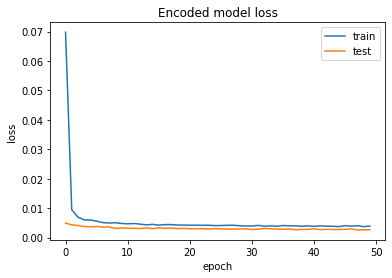

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994382180275835


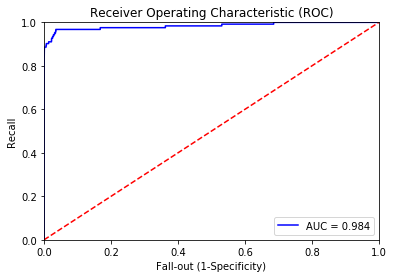

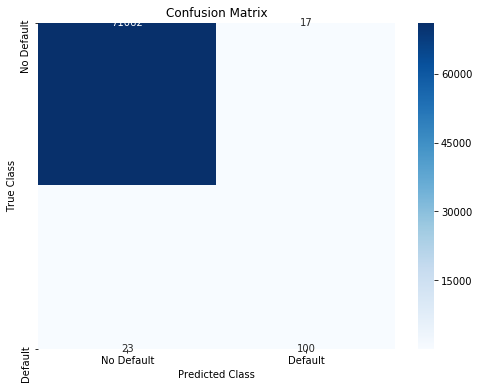

AUC(ROC): 0.9063844797904359
Precision: 0.8547008547008547
Recall: 0.8130081300813008
F1 score: 0.8333333333333333
False positives: 17
True positives: 100
False negatives: 23
True negatives: 71062
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 22s 102us/step - loss: 0.0020 - val_loss: 3.2518e-04
Epoch 2/150
213605/213605 [==============================] - 21s 98us/step - loss: 2.3409e-04 - val_loss: 1.6830e-04
Epoch 3/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.4773e-04 - val_loss: 1.3692e-04
Epoch 4/150
213605/213605 [==============================] - 20s 95us/step - loss: 1.3029e-04 - val_loss: 1.2001e-04
Epoch 5/150
213605/213605 [==============================] - 21s 96us/step - loss: 1.1919e-04 - val_loss: 1.1307e-04
Epoch 6/150
213605/213605 [==============================] - 20s 96us/step - loss: 1.1182e-04 - val_loss: 1.0502e-04
Epoch 7/150
213605/213605 [==================

213605/213605 [==============================] - 20s 94us/step - loss: 3.9248e-05 - val_loss: 3.7059e-05
Epoch 69/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.9213e-05 - val_loss: 3.5210e-05
Epoch 70/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.9019e-05 - val_loss: 4.9020e-05
Epoch 71/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.8809e-05 - val_loss: 3.9896e-05
Epoch 72/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.8578e-05 - val_loss: 4.3392e-05
Epoch 73/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.8221e-05 - val_loss: 4.3428e-05
Epoch 74/150
213605/213605 [==============================] - 19s 91us/step - loss: 3.8436e-05 - val_loss: 3.7478e-05
Epoch 75/150
213605/213605 [==============================] - 19s 91us/step - loss: 3.8122e-05 - val_loss: 3.9860e-05
Epoch 76/150
213605/213605 [==============================] - 19s 90u

213605/213605 [==============================] - 20s 95us/step - loss: 3.0630e-05 - val_loss: 2.7315e-05
Epoch 138/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.0732e-05 - val_loss: 2.8830e-05
Epoch 139/150
213605/213605 [==============================] - 20s 93us/step - loss: 3.2067e-05 - val_loss: 3.1611e-05
Epoch 140/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.0648e-05 - val_loss: 3.7405e-05
Epoch 141/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.0240e-05 - val_loss: 3.4209e-05
Epoch 142/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.0851e-05 - val_loss: 3.4081e-05
Epoch 143/150
213605/213605 [==============================] - 20s 93us/step - loss: 3.0246e-05 - val_loss: 3.1588e-05
Epoch 144/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.0423e-05 - val_loss: 3.1819e-05
Epoch 145/150
213605/213605 [==============================] -

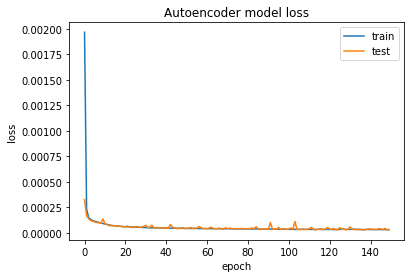

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 46s 216us/step - loss: 0.0247 - accuracy: 0.9947 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 2/50
213605/213605 [==============================] - 45s 209us/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/50
213605/213605 [==============================] - 44s 208us/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 4/50
213605/213605 [==============================] - 44s 208us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/50
213605/213605 [==============================] - 44s 206us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/50
213605/213605 [==============================] - 44s 208us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 7/50
213605/213605 [=================

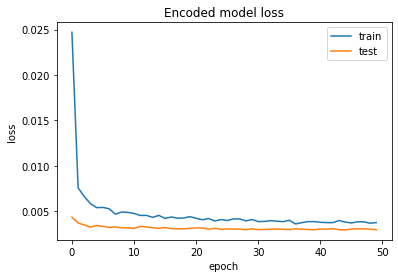

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994241734782731


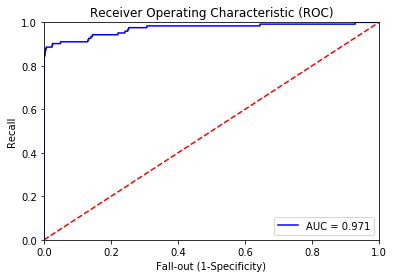

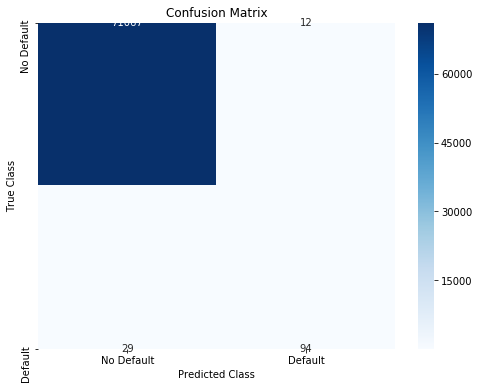

AUC(ROC): 0.8820294080204129
Precision: 0.8867924528301887
Recall: 0.7642276422764228
F1 score: 0.8209606986899564
False positives: 12
True positives: 94
False negatives: 29
True negatives: 71067
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 22s 102us/step - loss: 0.0019 - val_loss: 2.9464e-04
Epoch 2/150
213605/213605 [==============================] - 21s 99us/step - loss: 2.1955e-04 - val_loss: 2.0144e-04
Epoch 3/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.5106e-04 - val_loss: 1.3994e-04
Epoch 4/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.2477e-04 - val_loss: 1.2038e-04
Epoch 5/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.2043e-04 - val_loss: 1.2418e-04
Epoch 6/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.1505e-04 - val_loss: 1.1067e-04
Epoch 7/150
213605/213605 [==================

213605/213605 [==============================] - 21s 97us/step - loss: 3.8555e-05 - val_loss: 3.6873e-05
Epoch 69/150
213605/213605 [==============================] - 21s 97us/step - loss: 3.8196e-05 - val_loss: 3.6254e-05
Epoch 70/150
213605/213605 [==============================] - 21s 96us/step - loss: 3.8033e-05 - val_loss: 3.7310e-05
Epoch 71/150
213605/213605 [==============================] - 21s 98us/step - loss: 3.7731e-05 - val_loss: 3.8844e-05
Epoch 72/150
213605/213605 [==============================] - 21s 98us/step - loss: 3.7915e-05 - val_loss: 3.7963e-05
Epoch 73/150
213605/213605 [==============================] - 21s 97us/step - loss: 3.7088e-05 - val_loss: 4.4659e-05
Epoch 74/150
213605/213605 [==============================] - 21s 98us/step - loss: 3.7534e-05 - val_loss: 3.5087e-05
Epoch 75/150
213605/213605 [==============================] - 21s 98us/step - loss: 3.7293e-05 - val_loss: 3.4242e-05
Epoch 76/150
213605/213605 [==============================] - 21s 98u

213605/213605 [==============================] - 20s 95us/step - loss: 3.2367e-05 - val_loss: 3.4602e-05
Epoch 138/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.1642e-05 - val_loss: 3.3062e-05
Epoch 139/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.1655e-05 - val_loss: 3.1964e-05
Epoch 140/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.1644e-05 - val_loss: 3.4469e-05
Epoch 141/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.1634e-05 - val_loss: 3.2063e-05
Epoch 142/150
213605/213605 [==============================] - 20s 96us/step - loss: 3.1294e-05 - val_loss: 3.8494e-05
Epoch 143/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.1376e-05 - val_loss: 3.2172e-05
Epoch 144/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.1582e-05 - val_loss: 3.4955e-05
Epoch 145/150
213605/213605 [==============================] -

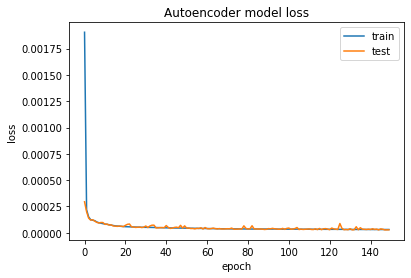

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 46s 214us/step - loss: 0.0230 - accuracy: 0.9955 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 2/50
213605/213605 [==============================] - 45s 211us/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 3/50
213605/213605 [==============================] - 45s 209us/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 4/50
213605/213605 [==============================] - 45s 209us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 5/50
213605/213605 [==============================] - 45s 212us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 6/50
213605/213605 [==============================] - 46s 214us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 7/50
213605/213605 [=================

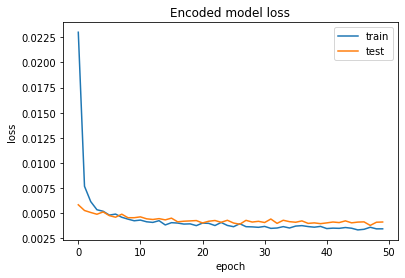

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992275497879273


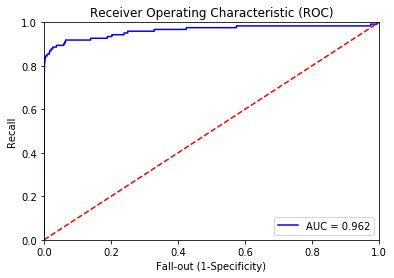

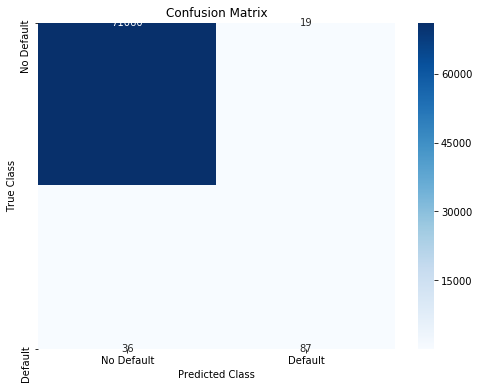

AUC(ROC): 0.8535248824821849
Precision: 0.8207547169811321
Recall: 0.7073170731707317
F1 score: 0.7598253275109171
False positives: 19
True positives: 87
False negatives: 36
True negatives: 71060
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Train on 213606 samples, validate on 71201 samples
Epoch 1/150
213606/213606 [==============================] - 22s 103us/step - loss: 0.0017 - val_loss: 3.3630e-04
Epoch 2/150
213606/213606 [==============================] - 21s 100us/step - loss: 2.0943e-04 - val_loss: 1.8887e-04
Epoch 3/150
213606/213606 [==============================] - 21s 99us/step - loss: 1.3862e-04 - val_loss: 1.3448e-04
Epoch 4/150
213606/213606 [==============================] - 21s 99us/step - loss: 1.2691e-04 - val_loss: 1.5072e-04
Epoch 5/150
213606/213606 [==============================] - 21s 98us/step - loss: 1.2148e-04 - val_loss: 1.2100e-04
Epoch 6/150
213606/213606 [==============================] - 21s 98us/step - loss: 1.1044e-04 - val_loss: 1.0764e-04
Epoch 7/150
213606/213606 [=================

213606/213606 [==============================] - 21s 98us/step - loss: 4.0435e-05 - val_loss: 3.8180e-05
Epoch 69/150
213606/213606 [==============================] - 21s 98us/step - loss: 3.9856e-05 - val_loss: 4.5686e-05
Epoch 70/150
213606/213606 [==============================] - 21s 98us/step - loss: 3.9863e-05 - val_loss: 5.0597e-05
Epoch 71/150
213606/213606 [==============================] - 21s 97us/step - loss: 3.9474e-05 - val_loss: 4.7908e-05
Epoch 72/150
213606/213606 [==============================] - 21s 99us/step - loss: 3.9561e-05 - val_loss: 3.8301e-05
Epoch 73/150
213606/213606 [==============================] - 21s 99us/step - loss: 3.9364e-05 - val_loss: 3.8303e-05
Epoch 74/150
213606/213606 [==============================] - 21s 99us/step - loss: 3.9040e-05 - val_loss: 3.7497e-05
Epoch 75/150
213606/213606 [==============================] - 21s 99us/step - loss: 3.9065e-05 - val_loss: 4.1010e-05
Epoch 76/150
213606/213606 [==============================] - 21s 99u

213606/213606 [==============================] - 20s 95us/step - loss: 3.4983e-05 - val_loss: 3.5347e-05
Epoch 138/150
213606/213606 [==============================] - 20s 95us/step - loss: 3.5021e-05 - val_loss: 3.9117e-05
Epoch 139/150
213606/213606 [==============================] - 20s 96us/step - loss: 3.4725e-05 - val_loss: 3.7165e-05
Epoch 140/150
213606/213606 [==============================] - 20s 95us/step - loss: 3.4834e-05 - val_loss: 3.3171e-05
Epoch 141/150
213606/213606 [==============================] - 20s 96us/step - loss: 3.4837e-05 - val_loss: 3.5786e-05
Epoch 142/150
213606/213606 [==============================] - 20s 95us/step - loss: 3.4977e-05 - val_loss: 3.8941e-05
Epoch 143/150
213606/213606 [==============================] - 20s 95us/step - loss: 3.4719e-05 - val_loss: 3.4105e-05
Epoch 144/150
213606/213606 [==============================] - 20s 95us/step - loss: 3.4631e-05 - val_loss: 3.5511e-05
Epoch 145/150
213606/213606 [==============================] -

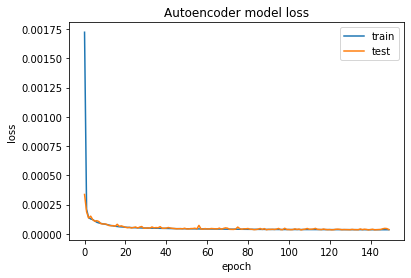

Train on 213606 samples, validate on 71201 samples
Epoch 1/50
213606/213606 [==============================] - 48s 226us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 2/50
213606/213606 [==============================] - 46s 217us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 3/50
213606/213606 [==============================] - 45s 212us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 4/50
213606/213606 [==============================] - 45s 212us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 5/50
213606/213606 [==============================] - 46s 218us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 6/50
213606/213606 [==============================] - 46s 217us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 7/50
213606/213606 [=================

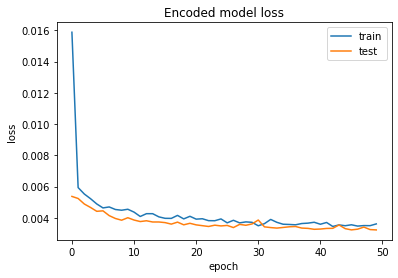

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993539416581227


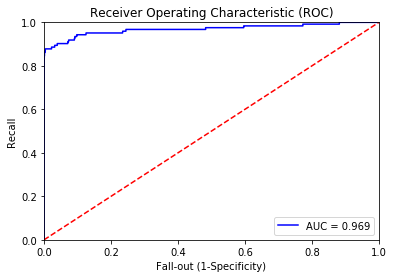

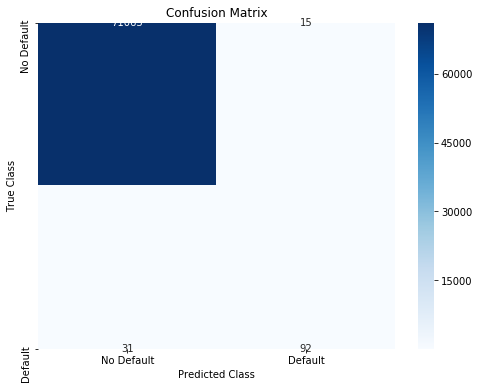

AUC(ROC): 0.8738782219556347
Precision: 0.8598130841121495
Recall: 0.7479674796747967
F1 score: 0.7999999999999999
False positives: 15
True positives: 92
False negatives: 31
True negatives: 71063


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 71063.0
 Average fp = 15.75
 Average fn = 29.75
 Average tp = 93.25
 Average Precision = 0.8555045871559633
 Average Recall = 0.758130081300813
 Average F1 score = 0.8038793103448276


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284252
 Total fp: 63
 Total fn: 119
 Total tp: 373
 Total Precision = 0.8555045871559633
 Total Recall = 0.758130081300813
 Total F1_score = 0.8038793103448276


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 21692.47593998909 seconds ---
21692.477940559387


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

6.025688316822052
